In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [3]:
train_data.dtypes, train_data.shape, test_data.dtypes, test_data.shape

(ID                object
 Store_id           int64
 Store_Type        object
 Location_Type     object
 Region_Code       object
 Date              object
 Holiday            int64
 Discount          object
 #Order             int64
 Sales            float64
 dtype: object,
 (188340, 10),
 ID               object
 Store_id          int64
 Store_Type       object
 Location_Type    object
 Region_Code      object
 Date             object
 Holiday           int64
 Discount         object
 dtype: object,
 (22265, 8))

In [4]:
train_data.head(5), train_data.info()
# [train_data["Store_Type"].unique()] # 4 records S1, S2, S3, S4
# [train_data["Region_Code"].unique()] # 4 records R1, R2, R3, R4
# [train_data["Location_Type"].unique()] # 5 records L1, L2, L3, L4, L5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


(         ID  Store_id Store_Type Location_Type Region_Code        Date  \
 0  T1000001         1         S1            L3          R1  2018-01-01   
 1  T1000002       253         S4            L2          R1  2018-01-01   
 2  T1000003       252         S3            L2          R1  2018-01-01   
 3  T1000004       251         S2            L3          R1  2018-01-01   
 4  T1000005       250         S2            L3          R4  2018-01-01   
 
    Holiday Discount  #Order     Sales  
 0        1      Yes       9   7011.84  
 1        1      Yes      60  51789.12  
 2        1      Yes      42  36868.20  
 3        1      Yes      23  19715.16  
 4        1      Yes      62  45614.52  ,
 None)

In [5]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train_data, title="Pandas Profiling Report")
# profile.to_widgets()

### Based on data profile
* No missing data in any feature
* ID is really unique identifier --> Hence can be used as index
* Store_Type, Region_type, Location_Type and Region_Code are categorical variables
* Holiday and Discount can be made boolean based.
* Sales are distributed like bell-curve.

In [6]:
train_data.set_index("ID",inplace=True)
test_data.set_index("ID",inplace=True)

bool_int_map={True:1, False:0}

# #Order column is missing in the input test data. Hence this data will be missing
train_data["Date"] = pd.to_datetime(train_data.Date,format="%Y-%m-%d")
test_data["Date"] = pd.to_datetime(test_data.Date,format="%Y-%m-%d")

# Is the day a weekend?
train_data["dayofweek"]=train_data["Date"].dt.dayofweek
test_data["dayofweek"]=test_data["Date"].dt.dayofweek
train_data["weekend"] = train_data["dayofweek"]>=5
test_data["weekend"] = test_data["dayofweek"]>=5
train_data.drop('dayofweek', inplace=True, axis=1)
test_data.drop('dayofweek', inplace=True, axis=1)

train_data["weekend"] = train_data["weekend"].map(bool_int_map)
test_data["weekend"] = test_data["weekend"].map(bool_int_map)

# train_data["quarter"]=train_data["Date"].dt.quarter
# test_data["quarter"]=test_data["Date"].dt.quarter

# train_data["Date"] = train_data["Date"].dt.date
# test_data["Date"] = test_data["Date"].dt.date
# # holiday_map = {0:False, 1:True}
# train_data["Holiday"] = train_data["Holiday"].map(holiday_map)
# test_data["Holiday"] = test_data["Holiday"].map(holiday_map)

discount_map = {"Yes":1, "No":0}
train_data["Discount"] = train_data["Discount"].map(discount_map)
test_data["Discount"] = test_data["Discount"].map(discount_map)

categ_fts =[ 'Store_Type', 'Location_Type', 'Region_Code']
for ft in categ_fts:
    train_data[ft] = train_data[ft].astype("category")
    test_data[ft] = test_data[ft].astype("category")


In [7]:
# int_bool_map = {0:False, 1:True}

# train_data["Holiday"] = train_data["Holiday"].map(int_bool_map)
# train_data["Discount"] = train_data["Discount"].map(int_bool_map)
train_data

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,weekend
ID,,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,0
T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,0
T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,0
T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,0
T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,0
...,...,...,...,...,...,...,...,...,...,...
T1188336,149,S2,L3,R2,2019-05-31,1,1,51,37272.00,0
T1188337,153,S4,L2,R1,2019-05-31,1,0,90,54572.64,0
T1188338,154,S1,L3,R2,2019-05-31,1,0,56,31624.56,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

num_fts = [x for x in test_data.select_dtypes(include="number").columns]
cat_fts = [x for x in test_data.select_dtypes(include=["bool","category"]).columns if x !="Store_id"]


target="Sales"
features=[x for x in test_data.columns if x not in target]

In [9]:
# num_fts = [x for x in train_data.select_dtypes(include="number").columns]
# cat_fts = [x for x in train_data.select_dtypes(include=["bool"]).columns]
cat_fts2 = [x for x in train_data.select_dtypes(include=["bool"]).columns]

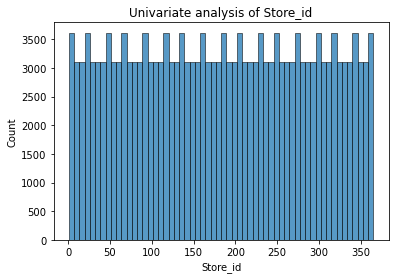

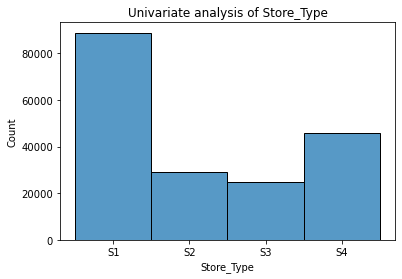

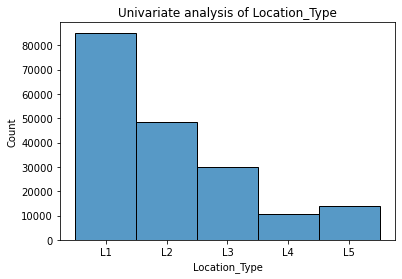

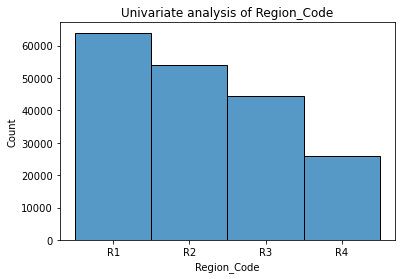

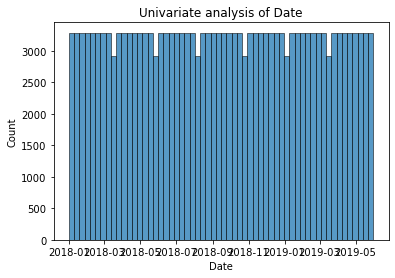

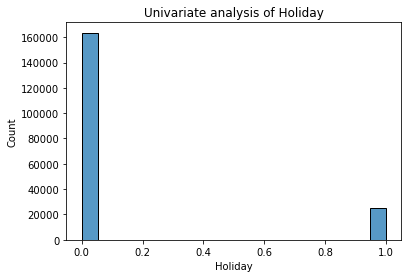

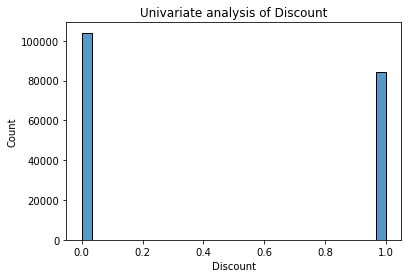

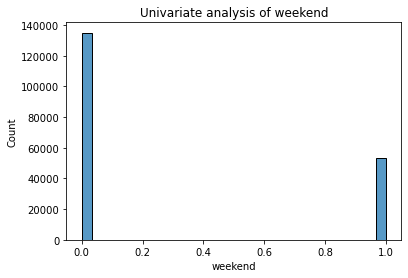

In [10]:
for feature in features:
    if feature in cat_fts2:
        sns.histplot(train_data[feature].astype("int64"))
    else:
        sns.histplot(train_data, x=feature)
    plt.title(f"Univariate analysis of {feature}")
    plt.show()

In [11]:
categorical_fts = [x for x in train_data.select_dtypes(include=["bool","object"]).columns]

In [12]:
for ft in categorical_fts:
    sns.scatterplot(data=train_data, x=ft, y=target, hue=ft)
    plt.show()

Sales are more if 
* Discount is given 
* That day is not a holiday
* sales is done in R1 type region and L2 type location, S4 type store

### Convert categorical features
Convert categorical features to one_hot_encoding

In [13]:
for ft in cat_fts:
    dummy = pd.get_dummies(train_data[ft], prefix=f"{ft[0]}{ft[ft.find('_')+1]}", drop_first=True)
    train_data = pd.merge(train_data, dummy, left_index=True, right_index=True).drop(ft,axis=1)

In [14]:
for ft in cat_fts:
    dummy = pd.get_dummies(test_data[ft], prefix=f"{ft[0]}{ft[ft.find('_')+1]}", drop_first=True)
    test_data = pd.merge(test_data, dummy, left_index=True, right_index=True).drop(ft,axis=1)

In [15]:
features = [x for x in test_data.select_dtypes("number").columns]

In [16]:
test_data.select_dtypes("number").columns

Index(['Store_id', 'Holiday', 'Discount', 'weekend', 'ST_S2', 'ST_S3', 'ST_S4',
       'LT_L2', 'LT_L3', 'LT_L4', 'LT_L5', 'RC_R2', 'RC_R3', 'RC_R4'],
      dtype='object')

In [17]:
# sns.lineplot(train_data["Date"], train_data["Sales"], hue="ST_S2")
"""
from statsmodels.tsa.stattools import adfuller
X = train_data[["Sales"]].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
"""
# p value is approximately 0.0000 < 0.005 Hence we can deny the null hypothesis
# This is non stationary based on the statistics test. 

'\nfrom statsmodels.tsa.stattools import adfuller\nX = train_data[["Sales"]].values\nresult = adfuller(X)\nprint(\'ADF Statistic: %f\' % result[0])\nprint(\'p-value: %f\' % result[1])\nprint(\'Critical Values:\')\nfor key, value in result[4].items():\n\tprint(\'\t%s: %.3f\' % (key, value))\n'